# Load Data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
dfs = pd.read_json('MLA_100k_checked_v3.jsonlines', lines=True)

In [2]:
dfs = dfs.rename(columns = {'tags':'tag'})
dfs = dfs.rename(columns = {'id':'Id'})

## Get features from dictionary columns

In [3]:
# Get region
dfs['seller_country'] = dfs.apply(lambda x : x['seller_address']['country']['name'], axis = 1)
dfs['seller_state'] = dfs.apply(lambda x : x['seller_address']['state']['name'], axis = 1)
dfs['seller_city'] = dfs.apply(lambda x : x['seller_address']['city']['name'], axis = 1)

In [4]:
# Transform id (named as descriptions) column to get data
import ast
def str_to_dict(column):
    for i in range(len(column)):
        try:
            column[i] = ast.literal_eval(column[i][0])
        except:
            return

str_to_dict(dfs['descriptions'])

In [5]:
# get data from descriptions and shipping 
dfs = pd.concat([dfs, dfs["descriptions"].apply(pd.Series)], axis=1)
dfs = pd.concat([dfs, dfs["shipping"].apply(pd.Series)], axis=1)

In [6]:
pd.set_option('display.max_columns', None)
dfs.head(5)

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tag,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,Id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity,seller_country,seller_state,seller_city,0,id,local_pick_up,methods,tags,free_shipping,mode,dimensions,free_methods
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6553902747,[],MLA126406,{'id': 'MLA4695330653-912855983'},2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53,active,None,NaN,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,Argentina,Capital Federal,San Cristóbal,NaN,MLA4695330653-912855983,True,[],[],False,not_specified,None,NaN
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,[],,MLA7727150374,[],MLA10267,{'id': 'MLA7160447179-930764806'},2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25 18:08:30,active,None,NaN,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,Argentina,Capital Federal,Buenos Aires,NaN,MLA7160447179-930764806,True,[],[],False,me2,None,NaN
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6561247998,[],MLA1227,{'id': 'MLA7367189936-916478256'},2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-08 23:57:07,active,None,NaN,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,Argentina,Capital Federal,Boedo,NaN,MLA7367189936-916478256,True,[],[],False,me2,None,NaN
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,[],,None,[],MLA86345,{'id': 'MLA9191625553-932309698'},2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,NaN,NaN,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-12-04 01:13:16,active,None,NaN,NaN,1,2015-09-28 18:47:56,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,Argentina,Capital Federal,Floresta,NaN,MLA9191625553-932309698,True,[],[],False,me2,None,NaN
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI RE

In [7]:
# Get payment methods from dict
def convertCol(x,key,i):
    try:
        return x[i][key]
    except: 
        return ''
    
for key in ['description']: #['description','id','type'] -- only description is interesting
    for i in range(0,13):
        dfs[f'payment_{key}{i}'] = dfs['non_mercado_pago_payment_methods'].apply(lambda x: convertCol(x,key,i))

In [8]:
# Create a boolean column for each payment method 
lista_c = []
for i in range(0,13):
    lista = dfs[f'payment_description{i}'].unique()
    lista_c.extend(lista)

desc_uniques = set(lista_c)
desc_uniques.remove('')
desc_uniques

{'Acordar con el comprador',
 'American Express',
 'Cheque certificado',
 'Contra reembolso',
 'Diners',
 'Efectivo',
 'Giro postal',
 'MasterCard',
 'Mastercard Maestro',
 'MercadoPago',
 'Tarjeta de crédito',
 'Transferencia bancaria',
 'Visa',
 'Visa Electron'}

In [9]:
# Rename column for an improved dataframe (#TODO: Use apply for performance)
for col in desc_uniques:
    col_name=col.replace(' ','_')
    dfs[col_name] = dfs.isin([col]).any(axis=1)

# drop older columns
dfs = dfs.drop(dfs.loc[:, 'payment_description0':'payment_description12'], axis = 1)

In [10]:
import numpy as np
dfs = dfs.applymap(lambda x: x if x else np.nan)
dfs = dfs.dropna(how='all', axis=1)

# Data Transformation

## Change type and filter columns

COLUNAS QUE FICAM:
- warranty fica
- sub_status fica, quando suspende anúncio, pode ter a ver
- base_price fica
- seller_id fica
- price fica
- buying_mode fica
- parent_item_id fica
- last_updated fica
- id fica
- official_store_id fica
- accepts_mercadopago fica (duplicado com mercado pago?)
- original_price fica
- currency_id fica
- title fica
- automatic_relist fica
- stop_time fica
- status fica
- video_id fica (pode ser vídeo de usados)
- initial_quantity definitivamente fica
- start_time fica
- sold_quantity fica
- available_quantity fica
- seller_country, state, city fica
- local_pick_up fica
- free_shipping fica (provavelmente usados usam menos, venda privada)
- Contra_reembolso fica (usados precisam de reembolso)
- Giro_postal fica
- mode fica (não sei o que é, mas tá completa, not_specified pode ser mais comum em usados)
- tags fica
- date_created

FICA MAS TRANFORMAR (pagamentos):
- Cheque_certificado
- Mastercard_Maestro
- Diners
- Transferencia_bancaria
- MercadoPago (será? duplicado com accepts mercadopago?)
- Efectivo
- Tarjeta_de_crédito (duplicado com outras colunas? mesclar colunas e preencher essa)
- American_Express
- MasterCard
- Visa_Electron
- Visa
- Acordar_con_el_comprador

COLUNAS QUE SAIEM:
- seller_address sai
- deals_ids sai, não parece dizer nada relevante para nós
- shipping sai
- non_mercad_pago_etc (transformei) sai
- site_id sai
- listin_type_id sai
- category sai
- description sai (virou id)
- international_delivery_mode
- pictures sai
- thumbnail sai
- secure_thumbnail sai
- permalink sai
- free_methods sai, não parece ter info relevante


DÚVIDAS:
- variations não sei, mas acho que sai, são anuncios relacionados
- attributes não sei, mas acho que sai
- dimensions acho que sai



In [11]:
# Rename columns
dfs = dfs.rename(columns = {'id':'descr_id', 'Id': 'id'})

# Reorder columns
dfs = dfs[['title', 'condition', 'warranty','initial_quantity', 'available_quantity', 'sold_quantity',
                'sub_status', 'buying_mode', 'original_price', 'base_price', 'price', 'currency_id',
                'seller_country', 'seller_state', 'seller_city', 'Giro_postal',  
                'free_shipping', 'local_pick_up', 'mode', 'tags', 'tag',
                'Contra_reembolso','Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo', 'Transferencia_bancaria', 'Tarjeta_de_crédito',
                'Mastercard_Maestro', 'MasterCard', 'Visa_Electron', 'Visa', 'Diners', 'American_Express',
                'status', 'automatic_relist',
                'accepts_mercadopago', 'MercadoPago', 
                'id', 'descr_id', 'deal_ids', 'parent_item_id', 'category_id', 'seller_id', 'official_store_id', 'video_id',
                'date_created', 'start_time', 'last_updated', 'stop_time']]

In [12]:
dfs['accepts_mercadopago'].value_counts()

True    97781
Name: accepts_mercadopago, dtype: int64

In [13]:
dfs['MercadoPago'].value_counts()

True    720
Name: MercadoPago, dtype: int64

In [14]:
# Merge columns about same subjects
dfs['accepts_mercadopago'] = dfs['accepts_mercadopago'].fillna(dfs['MercadoPago'])

In [15]:
dfs['MasterCard'].value_counts()

True    647
Name: MasterCard, dtype: int64

In [16]:
dfs['MasterCard'] = dfs['Mastercard_Maestro'].fillna(dfs['MercadoPago'])

In [17]:
dfs['Visa'] = dfs['Visa_Electron'].fillna(dfs['Visa'])

In [18]:
dfs['Tarjeta_de_crédito'].value_counts()

True    24638
Name: Tarjeta_de_crédito, dtype: int64

In [19]:
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['Visa'])
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['MasterCard'])
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['Diners'])
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['American_Express'])
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['Visa'])

In [20]:
dfs['Tarjeta_de_crédito'].value_counts()

True    25928
Name: Tarjeta_de_crédito, dtype: int64

In [21]:
dfs = dfs.rename(columns = {'Tarjeta_de_crédito':'Aceptan_Tarjeta'})

In [22]:
# Drop used columns
dfs = dfs.drop(columns=['MercadoPago', 'Mastercard_Maestro', 'Visa_Electron'])
dfs = dfs.drop(columns=['Visa', 'MasterCard', 'Diners', 'American_Express'])

In [23]:
# Treat columns to access data
def try_join(l):
    try:
        return ','.join(map(str, l))
    except TypeError:
        return np.nan

dfs['sub_status'] = try_join(dfs['sub_status'])
dfs['tags'] = try_join(dfs['tags'])

In [24]:
dfs.columns

Index(['title', 'condition', 'warranty', 'initial_quantity',
       'available_quantity', 'sold_quantity', 'sub_status', 'buying_mode',
       'original_price', 'base_price', 'price', 'currency_id',
       'seller_country', 'seller_state', 'seller_city', 'Giro_postal',
       'free_shipping', 'local_pick_up', 'mode', 'tags', 'tag',
       'Contra_reembolso', 'Acordar_con_el_comprador', 'Cheque_certificado',
       'Efectivo', 'Transferencia_bancaria', 'Aceptan_Tarjeta', 'status',
       'automatic_relist', 'accepts_mercadopago', 'id', 'descr_id', 'deal_ids',
       'parent_item_id', 'category_id', 'seller_id', 'official_store_id',
       'video_id', 'date_created', 'start_time', 'last_updated', 'stop_time'],
      dtype='object')

In [25]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   title                     100000 non-null  object        
 1   condition                 100000 non-null  object        
 2   warranty                  39103 non-null   object        
 3   initial_quantity          100000 non-null  int64         
 4   available_quantity        100000 non-null  int64         
 5   sold_quantity             16920 non-null   float64       
 6   sub_status                100000 non-null  object        
 7   buying_mode               100000 non-null  object        
 8   original_price            143 non-null     float64       
 9   base_price                100000 non-null  float64       
 10  price                     100000 non-null  float64       
 11  currency_id               100000 non-null  object        
 12  sel

In [26]:
# Transform some columns to boolean type
dfs[['Giro_postal', 'free_shipping', 'local_pick_up', 'Contra_reembolso', 
     'Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo', 
     'Transferencia_bancaria', 'Aceptan_Tarjeta', 'automatic_relist']] = dfs[['Giro_postal', 'free_shipping', 'local_pick_up', 'Contra_reembolso', 
                                                          'Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo', 
                                                          'Transferencia_bancaria', 'Aceptan_Tarjeta', 'automatic_relist']].notna()

In [28]:
# Transform type of all columns
dfs = dfs.astype({'title':'str',
                  'condition': 'category', #bool
                  'warranty': 'category',
                  'initial_quantity': 'float', #int
                  'available_quantity': 'float', #int
                  'sold_quantity': 'float', #int
                  'sub_status': 'category', #bool?
                  'buying_mode': 'category',
                  'original_price': 'float',
                  'base_price': 'float',
                  'price': 'float',
                  'currency_id': 'category',
                  'seller_country': 'category',
                  'seller_state': 'category',
                  'seller_city': 'category',
                  'Giro_postal': 'bool',
                  'free_shipping': 'bool',
                  'local_pick_up': 'bool',
                  'mode': 'category',
                  'tags': 'category', #bool?
                  #'tag': 'category',
                  'Contra_reembolso': 'bool',
                  'Acordar_con_el_comprador': 'bool',
                  'Cheque_certificado': 'bool',
                  'Efectivo': 'bool',
                  'Transferencia_bancaria': 'bool',
                  'Aceptan_Tarjeta': 'bool',
                  'id': 'category',
                  'descr_id': 'category',
                  #'deal_ids': 'category',
                  'parent_item_id': 'category',
                  'category_id': 'category',
                  'seller_id': 'category',
                  'official_store_id': 'category',
                  'video_id': 'category',
                  #'date_created': 'datetime',
                  # 'start_time': 'datetime',
                  # 'last_updated': 'datetime',
                  # 'stop_time': 'datetime',
                  'status': 'category', #bool?
                  'automatic_relist': 'bool'
                                         })

In [29]:
dfs.columns

Index(['title', 'condition', 'warranty', 'initial_quantity',
       'available_quantity', 'sold_quantity', 'sub_status', 'buying_mode',
       'original_price', 'base_price', 'price', 'currency_id',
       'seller_country', 'seller_state', 'seller_city', 'Giro_postal',
       'free_shipping', 'local_pick_up', 'mode', 'tags', 'tag',
       'Contra_reembolso', 'Acordar_con_el_comprador', 'Cheque_certificado',
       'Efectivo', 'Transferencia_bancaria', 'Aceptan_Tarjeta', 'status',
       'automatic_relist', 'accepts_mercadopago', 'id', 'descr_id', 'deal_ids',
       'parent_item_id', 'category_id', 'seller_id', 'official_store_id',
       'video_id', 'date_created', 'start_time', 'last_updated', 'stop_time'],
      dtype='object')

In [30]:
# Check missing values
import numpy as np
import pandas as pd

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(dfs)

Your selected dataframe has 42 columns and 100000 Rows.
There are 13 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
descr_id,0,99959,100.0,99959,100.0,object
original_price,0,99857,99.9,99857,99.9,float64
deal_ids,0,99760,99.8,99760,99.8,object
official_store_id,0,99182,99.2,99182,99.2,float64
video_id,0,97015,97.0,97015,97.0,object
sold_quantity,0,83080,83.1,83080,83.1,float64
warranty,0,60897,60.9,60897,60.9,category
tag,0,24910,24.9,24910,24.9,object
parent_item_id,0,23011,23.0,23011,23.0,object
accepts_mercadopago,0,2219,2.2,2219,2.2,object


In [31]:
display(dfs['seller_country'].value_counts())
dfs = dfs.drop(columns = 'seller_country') # We can drop Country column, it's always Argentina
display(dfs['seller_city'].mode()[0])
display(dfs['seller_state'].mode()[0])
dfs['seller_city'] = dfs['seller_city'].fillna(dfs['seller_city'].mode()[0])
dfs['seller_state'] = dfs['seller_state'].fillna(dfs['seller_state'].mode()[0])

Argentina    99997
Name: seller_country, dtype: int64

'CABA'

'Capital Federal'

In [32]:
dfs['accepts_mercadopago'] = dfs['accepts_mercadopago'].fillna(False)
dfs['sold_quantity'] = dfs['sold_quantity'].fillna(0) # Is it ok to fill sold_quantity with 0? [VALIDATE]

In [33]:
dfs['warranty'] = dfs['warranty'].replace(r'^\s*$', np.nan, regex=True)
dfs['warranty'].isna().sum()

60897

In [34]:
import pandas as pd
df_temp1 = dfs[dfs['warranty'].isnull()]
df_temp1['warranty'] = False

df_temp2 = dfs[~dfs['warranty'].isnull()]
df_temp2['warranty'] = True

frames = [df_temp1, df_temp2]
dfs = pd.concat(frames)
dfs = dfs.astype({'warranty':'bool'})

In [35]:
dfs['warranty'].value_counts()

False    60897
True     39103
Name: warranty, dtype: int64

In [36]:
display('number of sold_quantity', dfs.sold_quantity.nunique())

'number of sold_quantity'

317

In [37]:
def get_value_per_cat():
    flag = dfs.select_dtypes(include=['category']).shape[1]
    i = 0

    while i <= flag:
        print(dict(dfs.select_dtypes(include=['category']).iloc[:,i:i+1].nunique()))
        i = i+1

get_value_per_cat()

{'condition': 2}
{'buying_mode': 3}
{'currency_id': 2}
{'seller_state': 24}
{'seller_city': 3655}
{'mode': 4}
{'status': 4}
{'category_id': 10907}
{'seller_id': 35915}
{}


In [38]:
dfs.columns

Index(['title', 'condition', 'warranty', 'initial_quantity',
       'available_quantity', 'sold_quantity', 'sub_status', 'buying_mode',
       'original_price', 'base_price', 'price', 'currency_id', 'seller_state',
       'seller_city', 'Giro_postal', 'free_shipping', 'local_pick_up', 'mode',
       'tags', 'tag', 'Contra_reembolso', 'Acordar_con_el_comprador',
       'Cheque_certificado', 'Efectivo', 'Transferencia_bancaria',
       'Aceptan_Tarjeta', 'status', 'automatic_relist', 'accepts_mercadopago',
       'id', 'descr_id', 'deal_ids', 'parent_item_id', 'category_id',
       'seller_id', 'official_store_id', 'video_id', 'date_created',
       'start_time', 'last_updated', 'stop_time'],
      dtype='object')

In [39]:
import re
dfs['sub_status'] = dfs['sub_status'].str.replace('nan,','')
dfs['sub_status'] = dfs['sub_status'].str.replace(',nan','')
display(len(re.findall(r'suspended',dfs['sub_status'][1])))
display(dfs['sub_status'].value_counts().value_counts())
display(dfs.shape)

# We concluded this column is useless: every row has the same count of the same value ('suspended')
dfs = dfs.drop('sub_status', axis=1)

In [40]:
# dfs['tags'] = dfs['tags'].str.replace('nan,','')
# dfs['tags'] = dfs['tags'].str.replace(',nan','')

# from ast import literal_eval
# dfs['tags'] = dfs['tags'].apply(lambda x: literal_eval(str(x)))

# def deduplicate(column):
#     flag = len(column)
#     i = 0
    
#     while i <= flag:
#         try:
#             # 1. Convert into list of tuples
#             tpls = [tuple(x) for x in column[i]]
#             # 2. Create dictionary with empty values and
#             # 3. convert back to a list (dups removed)
#             dct = list(dict.fromkeys(tpls))
#             # 4. Convert list of tuples to list of lists
#             dup_free = [list(x) for x in lst]
#             # Print everything
#             column[i] = list(map(''.join, dup_free))
#             # [[1, 1], [0, 1], [0, 1], [1, 1]]
#             i = i+1
#         except:
#             return
        
# deduplicate(dfs['tags'])
# display(dfs['tags'].value_counts().value_counts())
# display(dfs.shape)
# display(dfs['tag'].value_counts().value_counts())

# Other useless colums -- all rows have the same values
dfs = dfs.drop('tags', axis=1)
dfs = dfs.drop('tag', axis=1)        

In [41]:
display('dataframe shape', dfs.shape)
display('unique ids', dfs.id.nunique())
display('number of sellers', dfs.seller_id.nunique())
display('number of categories', dfs.category_id.nunique())

#Drop useless column
dfs = dfs.drop(['id'], axis=1)

'dataframe shape'

(100000, 38)

'unique ids'

100000

'number of sellers'

35915

'number of categories'

10907

In [42]:
missing_zero_values_table(dfs)

Your selected dataframe has 37 columns and 100000 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
descr_id,0,99959,100.0,99959,100.0,object
original_price,0,99857,99.9,99857,99.9,float64
deal_ids,0,99760,99.8,99760,99.8,object
official_store_id,0,99182,99.2,99182,99.2,float64
video_id,0,97015,97.0,97015,97.0,object
parent_item_id,0,23011,23.0,23011,23.0,object


In [43]:
dfs = dfs.dropna(axis=1) #drop all columns with missing values (we checked and they are not necessary)

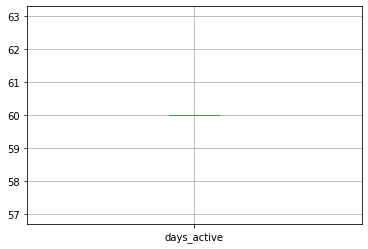

In [44]:
# Deal with datetimes to create new features
dfs['year_start'] = pd.to_datetime(dfs['start_time']).dt.year.astype('category')
dfs['month_start'] = pd.to_datetime(dfs['start_time']).dt.month.astype('category')
dfs['year_stop'] = pd.to_datetime(dfs['stop_time']).dt.year.astype('category')
dfs['month_stop'] = pd.to_datetime(dfs['stop_time']).dt.month.astype('category')
dfs['week_day'] = pd.to_datetime(dfs['stop_time']).dt.weekday.astype('category')
#dfs['days_active'] = (dfs['start_time'] - dfs['stop_time']).dt.days
dfs['days_active'] = [int(i.days) for i in (dfs.stop_time - dfs.start_time)]
dfs['days_active'] = dfs['days_active'].astype('int')
dfs = dfs.reset_index(drop=True)

#dfs = dfs.drop(['date_created', 'start_time', 'last_updated', 'stop_time'], axis=1)
boxplot = dfs.boxplot(column=['days_active'], showfliers=False)

# Feature Selection

In [45]:
from sklearn import preprocessing

mylist = list(dfs.select_dtypes(include=['category']).columns)
dfs[mylist] = dfs[mylist].apply(preprocessing.LabelEncoder().fit_transform)

In [46]:
import seaborn as sns
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr = dfs.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/tmp/ipykernel_2282343/1001402960.py:19: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2)\


,condition,warranty,initial_quantity,available_quantity,sold_quantity,buying_mode,base_price,price,currency_id,seller_state,seller_city,Giro_postal,free_shipping,local_pick_up,mode,Contra_reembolso,Acordar_con_el_comprador,Cheque_certificado,Efectivo,Transferencia_bancaria,Aceptan_Tarjeta,status,automatic_relist,accepts_mercadopago,category_id,seller_id,year_start,month_start,year_stop,month_stop,week_day,days_active
condition,1.00,-0.13,-0.07,-0.07,-0.05,0.06,0.00,0.00,0.03,-0.01,-0.04,0.08,-0.14,-0.04,0.10,0.01,0.05,0.04,-0.05,-0.15,-0.21,-0.06,-0.19,-0.09,-0.10,0.01,-0.00,-0.01,0.01,-0.03,-0.02,-0.01
warranty,-0.13,1.00,0.05,0.05,0.02,-0.09,0.00,0.00,-0.06,-0.01,-0.08,0.16,0.08,0.03,-0.17,0.10,0.25,0.08,0.23,0.28,0.17,0.02,0.06,0.12,0.06,0.00,0.03,-0.01,-0.02,-0.01,0.00,-0.02
initial_quantity,-0.07,0.05,1.00,1.00,0.06,-0.01,-0.00,-0.00,-0.01,-0.01,0.00,-0.00,0.05,0.01,-0.02,-0.00,-0.00,-0.00,0.01,0.03,0.02,0.01,0.06,0.01,0.01,-0.00,0.00,0.00,-0.00,0.00,0.01,-0.00
available_quantity,-0.07,0.05,1.00,1.00,0.05,-0.01,-0.00,-0.00,-0.01,-0.01,0.00,-0.00,0.04,0.01,-0.02,-0.00,-0.00,-0.00,0.01,0.03,0.02,0.01,0.06,0.01,0.01,-0.00,0.00,0.00,-0.00,0.00,0.01,-0.00
sold_quantity,-0.05,0.02,0.06,0.05,1.00,-0.00,-0.00,-0.00,-0.00,-0.01,0.00,0.01,0.02,0.01,-0.01,0.00,0.03,-0.00,0.01,0.02,0.02,0.00,0.03,0.01,0.01,0.00,0.00,-0.00,-0.00,0.01,-0.00,0.00
buying_mode,0.06,-0.09,-0.01,-0.01,-0.00,1.00,0.02,0.02,0.43,-0.00,0.01,-0.01,-0.01,-0.26,0.09,-0.01,-0.04,-0.01,-0.18,-0.13,-0.07,0.02,-0.02,-0.86,-0.03,0.01,-0.20,-0.14,0.16,-0.02,-0.00,0.23
base_price,0.00,0.00,-0.00,-0.00,-0.00,0.02,1.00,1.00,0.00,-0.00,0.01,-0.00,-0.00,-0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.02,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
price,0.00,0.00,-0.00,-0.00,-0.00,0.02,1.00,1.00,0.00,-0.00,0.01,-0.00,-0.00,-0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.02,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
currency_id,0.03,-0.06,-0.01,-0.01,-0.00,0.43,0.00,0.00,1.00,-0.02,-0.00,-0.01,-0.01,-0.15,0.07,-0.01,-0.02,-0.01,-0.11,-0.08,-0.04,-0.01,-0.02,-0.50,-0.06,-0.00,-0.08,-0.09,0.08,-0.03,-0.01,0.16
seller_state,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.02,1.00,0.08,-0.01,0.02,-0.02,-0.01,0.02,-0.01,-0.01,-0.03,0.04,0.03,-0.00,-0.00,0.01,0.00,0.02,0.01,0.00,0.00,-0.00,0.01,-0.00


In [47]:
import numpy as np

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
dfs.columns

Index(['title', 'condition', 'warranty', 'initial_quantity',
       'available_quantity', 'sold_quantity', 'buying_mode', 'base_price',
       'price', 'currency_id', 'seller_state', 'seller_city', 'Giro_postal',
       'free_shipping', 'local_pick_up', 'mode', 'Contra_reembolso',
       'Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo',
       'Transferencia_bancaria', 'Aceptan_Tarjeta', 'status',
       'automatic_relist', 'accepts_mercadopago', 'category_id', 'seller_id',
       'date_created', 'start_time', 'last_updated', 'stop_time', 'year_start',
       'month_start', 'year_stop', 'month_stop', 'week_day', 'days_active'],
      dtype='object')

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
condition = {'new': 0,'used': 1}

#dfs.condition = [condition[item] for item in dfs.condition]


dfs = dfs.sample(100000).reset_index(drop=True)
#dfs = dfs.reset_index(drop=True)


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'category', 'bool']

#X = dfs.select_dtypes(include=numerics).drop(columns=['condition'], axis=1)
X = dfs.select_dtypes(include=numerics).drop(columns=['condition'], axis=1)
#X = dfs.drop(columns='condition')
y = dfs.condition

# clf = LogisticRegression().fit(X, y)
# result = permutation_importance(clf, X, y, n_repeats=10,
#                                  random_state=0)

[0.01751908 0.07678398 0.07940019 0.04706977 0.00306413 0.08887786
 0.08848702 0.00072857 0.04115521 0.09299218 0.00608014 0.01376957
 0.012488   0.02471171 0.00151831 0.00765218 0.0013018  0.01004776
 0.01625663 0.03090376 0.00673465 0.02744465 0.00329068 0.11307018
 0.09577431 0.00039427 0.01724247 0.00017161 0.01696062 0.0520696
 0.00603912]


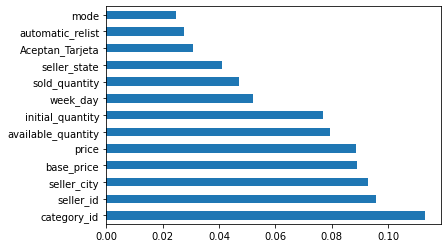

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [50]:
list_1 = feat_importances.nlargest(13)

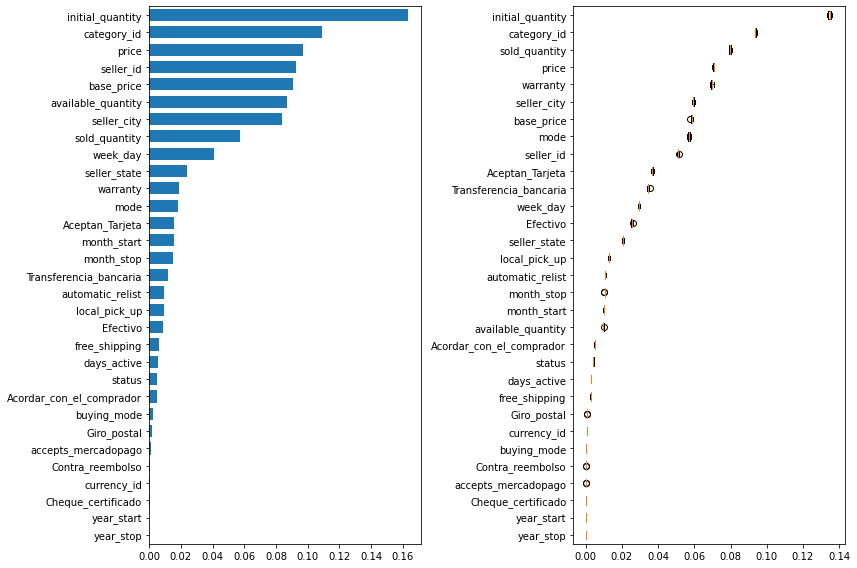

In [60]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
print("Accuracy on test data: {:.2f}".format(clf.score(X, y)))

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=-1) # number of repeats 10
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

In [61]:
list_2 = reversed(X.columns[tree_importance_sorted_idx])
list_2 = list(list_2)[0:13]

In [62]:
list_2

['initial_quantity',
 'category_id',
 'price',
 'seller_id',
 'base_price',
 'available_quantity',
 'seller_city',
 'sold_quantity',
 'week_day',
 'seller_state',
 'warranty',
 'mode',
 'Aceptan_Tarjeta']

'Elapsed time to compute the importances: 0.067 seconds'

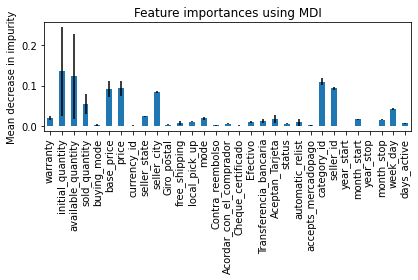

In [63]:
# Feature importance based on mean decrease in impurity
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)


import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

display(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#ax.set_xticks(tree_indices)
#ax.set_xticklabels(X.columns)
fig.tight_layout()

In [64]:
list_3 = forest_importances.nlargest(13)

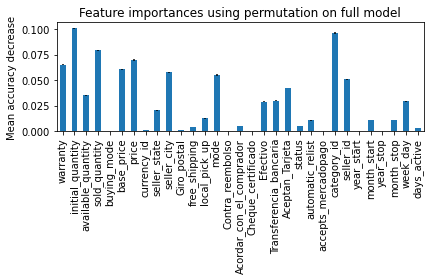

In [75]:
# # Feature importance based on permutation
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X, y, n_repeats=10, random_state=42, n_jobs=-1 # n_repeats = 10 
)
elapsed_time = time.time() - start_time
display(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")



forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
#ax.set_xticks(tree_indices)
#ax.set_xticklabels(X.columns)
fig.tight_layout()
plt.show()

In [74]:
list_4 = forest_importances.nlargest(13)

In [73]:
# # Handling multicollinearity
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# corr = spearmanr(X.dropna(how='any')).correlation

# # Ensure the correlation matrix is symmetric
# corr = (corr + corr.T) / 2
# np.fill_diagonal(corr, 1)

# # We convert the correlation matrix to a distance matrix before performing
# # hierarchical clustering using Ward's linkage.
# distance_matrix = 1 - np.abs(corr)
# dist_linkage = hierarchy.ward(squareform(distance_matrix))
# dendro = hierarchy.dendrogram(
#     dist_linkage, labels=data.feature_names.tolist(), ax=ax1, leaf_rotation=90
# )
# dendro_idx = np.arange(0, len(dendro["ivl"]))

# ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
# ax2.set_xticks(dendro_idx)
# ax2.set_yticks(dendro_idx)
# ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
# ax2.set_yticklabels(dendro["ivl"])
# fig.tight_layout()
# plt.show()

In [ ]:
# cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
# cluster_id_to_feature_ids = defaultdict(list)
# for idx, cluster_id in enumerate(cluster_ids):
#     cluster_id_to_feature_ids[cluster_id].append(idx)
# selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# X_train_sel = X_train[:, selected_features]
# X_test_sel = X_test[:, selected_features]

# clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
# clf_sel.fit(X_train_sel, y_train)
# print(
#     "Accuracy on test data with features removed: {:.2f}".format(
#         clf_sel.score(X_test_sel, y_test)
#     )
# )

In [ ]:
# import time
# import matplotlib.pyplot as plt

# start_time = time.time()
# img_shape = X.shape
# importances = forest.feature_importances_
# elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
# imp_reshaped = importances.reshape(img_shape)
# plt.matshow(imp_reshaped, cmap=plt.cm.hot)
# plt.title("Pixel importances using impurity values")
# plt.colorbar()
# plt.show()

In [76]:
# from sklearn.model_selection import train_test_split

# # Splits the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# from sklearn.ensemble import RandomForestRegressor
# # Defines the estimator used by the Boruta algorithm
# estimator = RandomForestRegressor()

# from boruta import BorutaPy
# # Creates the BorutaPy object
# boruta = BorutaPy(estimator = estimator, n_estimators = 'auto', max_iter = 100)
# # Fits Boruta
# boruta.fit(np.array(X_train), np.array(y_train))

# Important features
important = list(X.columns[boruta.support_])
print(f"Features confirmed as important: {important}")
# Tentative features
tentative = list(X.columns[boruta.support_weak_])
print(f"Unconfirmed features (tentative): {tentative}")
# Unimportant features
unimportant = list(X.columns[~(boruta.support_ | boruta.support_weak_)])
print(f"Features confirmed as unimportant: {unimportant}")

Features confirmed as important: ['initial_quantity', 'sold_quantity', 'base_price', 'price', 'seller_city', 'category_id', 'seller_id']
Unconfirmed features (tentative): []
Features confirmed as unimportant: ['warranty', 'available_quantity', 'buying_mode', 'currency_id', 'seller_state', 'Giro_postal', 'free_shipping', 'local_pick_up', 'mode', 'Contra_reembolso', 'Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo', 'Transferencia_bancaria', 'Aceptan_Tarjeta', 'status', 'automatic_relist', 'accepts_mercadopago', 'year_start', 'month_start', 'year_stop', 'month_stop', 'week_day', 'days_active']


In [77]:
list_5 = important + tentative

In [78]:
selected_features = set([y for x in [list_1.index, list_2, list_3.index, list_4.index, list_5] for y in x])
selected_features

{'Aceptan_Tarjeta',
 'Transferencia_bancaria',
 'automatic_relist',
 'available_quantity',
 'base_price',
 'category_id',
 'initial_quantity',
 'mode',
 'price',
 'seller_city',
 'seller_id',
 'seller_state',
 'sold_quantity',
 'warranty',
 'week_day'}

In [79]:
# from BorutaShap import BorutaShap
# import tqdm as notebook_tqdm

# # Creates a BorutaShap selector for regression
# selector = BorutaShap(importance_measure = 'shap', classification = False)

# # Fits the selector
# selector.fit(X = X_train, y = y_train, n_trials = 100, sample = False, verbose = True)
# # n_trials -> number of iterations for Boruta algorithm
# # sample -> samples the data so it goes faster

# # Display features to be removed
# features_to_remove = selector.features_to_remove
# print(features_to_remove)
# # Removes them
# X_train_boruta_shap = X_train.drop(columns = features_to_remove)
# X_test_boruta_shap = X_test.drop(columns = features_to_remove)

In [81]:
# open file in write mode
with open(r'selected_features.txt', 'w') as fp:
    for item in selected_features:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done
